11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
750/750 [==============================] - 60s 74ms/step - loss: 0.2050 - accuracy: 0.9381 - val_loss: 0.0690 - val_accuracy: 0.9796
Epoch 2/5
750/750 [==============================] - 44s 58ms/step - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0470 - val_accuracy: 0.9866
Epoch 3/5
750/750 [==============================] - 46s 61ms/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.0509 - val_accuracy: 0.9851
Epoch 4/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0436 - val_accuracy: 0.9875
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0385 - accuracy: 0.9881
Test accuracy: 0.988099992275238
1/1 [==============================] - 0s 109ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


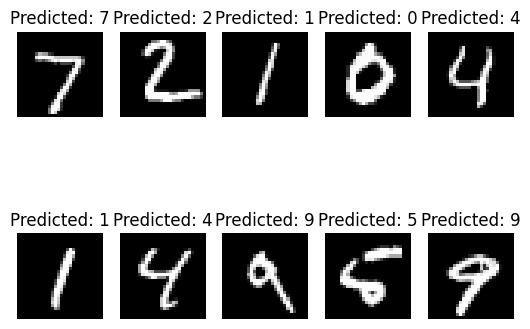

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to add a channel for convolutional layers
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('number_detection_model.h5')

# Visualize predictions
predictions = model.predict(test_images[:10])
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions[i])}')
    plt.axis('off')
plt.show()
